In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [4]:
#read the image
image = cv2.imread('D:/images/d1.jpg')

#print out the type of image and its dimensions
print('This image is:', type(image), 'with dimensions: ', image.shape)

This image is: <class 'numpy.ndarray'> with dimensions:  (168, 300, 3)


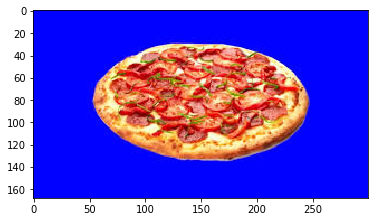

In [6]:
%matplotlib inline

#make a copy of the image
image_copy = np.copy(image)

#change color to RGB from BGR
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

#display the image
plt.imshow(image_copy)

In [11]:
#define our color selection boundaries in RGB values
lower_blue = np.array([0,0,220])
upper_blue = np.array([50,70,255])

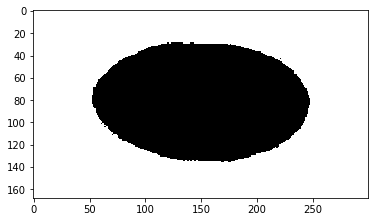

In [12]:
#define the masked areas
mask = cv2.inRange(image_copy, lower_blue, upper_blue)

#vizualize the mask
plt.imshow(mask, cmap='gray')

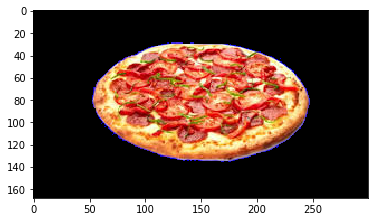

In [13]:
#mask the image to let the pizza show thrugh
masked_image = np.copy(image_copy)

masked_image[mask !=0] = [0, 0, 0]

#display it
plt.imshow(masked_image)

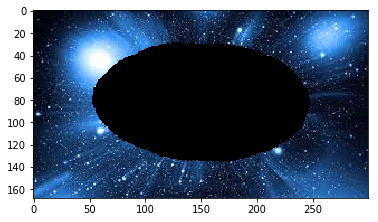

In [16]:
#load in a background image, and convert it to RGB
background_image = cv2.imread('D:/images/d2.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

#crop it to the right size (514x816)
crop_background = background_image[0:514, 0:816]

#Mask the cropped background so that the pizza area is blocked
crop_background[mask == 0] = [0, 0, 0]

#Display the background
plt.imshow(crop_background)

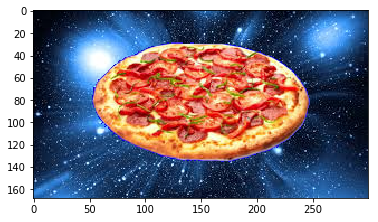

In [17]:
#Add the two image together to create a complete image
complete_image = crop_background + masked_image
plt.imshow(complete_image)